# Assignment 1.1 – Charles Book Club

This case study, adapted from Data Mining for Business Analytics (Shmueli et al., 2020), examines how the Charles Book Club tested customer interest in a new title, The Art History of Florence. Because mailing every member is expensive and most recipients are unlikely to purchase, the objective is to reduce unnecessary costs by identifying customers with a higher likelihood of buying. In this analysis, I apply segmentation and predictive modeling methods to recommend which customers should receive mailings, with the goal of improving both efficiency and profitability.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dmba

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

##  Prepare the data

In [30]:
import gdown

# Google Drive file ID
file_id = "1e-Pbx-X0dsgFffPmOQlI0jFpQ_HK4SlW"

# Direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(download_url, "CharlesBookClub.csv", quiet=False)

df = pd.read_csv("CharlesBookClub.csv")

Downloading...
From: https://drive.google.com/uc?id=1e-Pbx-X0dsgFffPmOQlI0jFpQ_HK4SlW
To: /Users/xuanwang/ADS505/CharlesBookClub.csv
100%|████████████████████████████████████████| 236k/236k [00:00<00:00, 3.25MB/s]


In [31]:
# Basic information
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)

Shape of dataset: (4000, 24)

Data types:
 Seq#                int64
ID#                 int64
Gender              int64
M                   int64
R                   int64
F                   int64
FirstPurch          int64
ChildBks            int64
YouthBks            int64
CookBks             int64
DoItYBks            int64
RefBks              int64
ArtBks              int64
GeogBks             int64
ItalCook            int64
ItalAtlas           int64
ItalArt             int64
Florence            int64
Related Purchase    int64
Mcode               int64
Rcode               int64
Fcode               int64
Yes_Florence        int64
No_Florence         int64
dtype: object


In [32]:
df.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1


In [33]:
df.describe()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,16594.623000,0.704500,208.091500,13.390500,3.833250,26.50725,0.639750,0.30475,0.731250,...,0.125250,0.037500,0.045750,0.084500,0.885000,4.281250,3.170000,2.085750,0.084500,0.915500
std,1154.844867,9484.433792,0.456324,100.948548,8.103822,3.458386,18.35138,0.994343,0.61194,1.089413,...,0.385486,0.214721,0.220611,0.278171,1.226234,0.915619,0.928071,0.831907,0.278171,0.278171
min,1.000000,25.000000,0.000000,15.000000,2.000000,1.000000,2.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1000.750000,8253.250000,0.000000,129.000000,8.000000,1.000000,12.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,1.000000,0.000000,1.000000
50%,2000.500000,16581.000000,1.000000,208.000000,12.000000,2.000000,20.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,0.000000,1.000000
75%,3000.250000,24838.250000,1.000000,283.000000,16.000000,6.000000,36.00000,1.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,3.000000,0.000000,1.000000
max,4000.000000,32977.000000,1.000000,479.000000,36.000000,12.000000,99.00000,7.000000,5.00000,7.000000,...,3.000000,2.000000,2.000000,1.000000,8.000000,5.000000,4.000000,3.000000,1.000000,1.000000


In [34]:
# Check for missing values
df.isnull().sum()

Seq#                0
ID#                 0
Gender              0
M                   0
R                   0
F                   0
FirstPurch          0
ChildBks            0
YouthBks            0
CookBks             0
DoItYBks            0
RefBks              0
ArtBks              0
GeogBks             0
ItalCook            0
ItalAtlas           0
ItalArt             0
Florence            0
Related Purchase    0
Mcode               0
Rcode               0
Fcode               0
Yes_Florence        0
No_Florence         0
dtype: int64

### EDA

#### Distribution of each variables

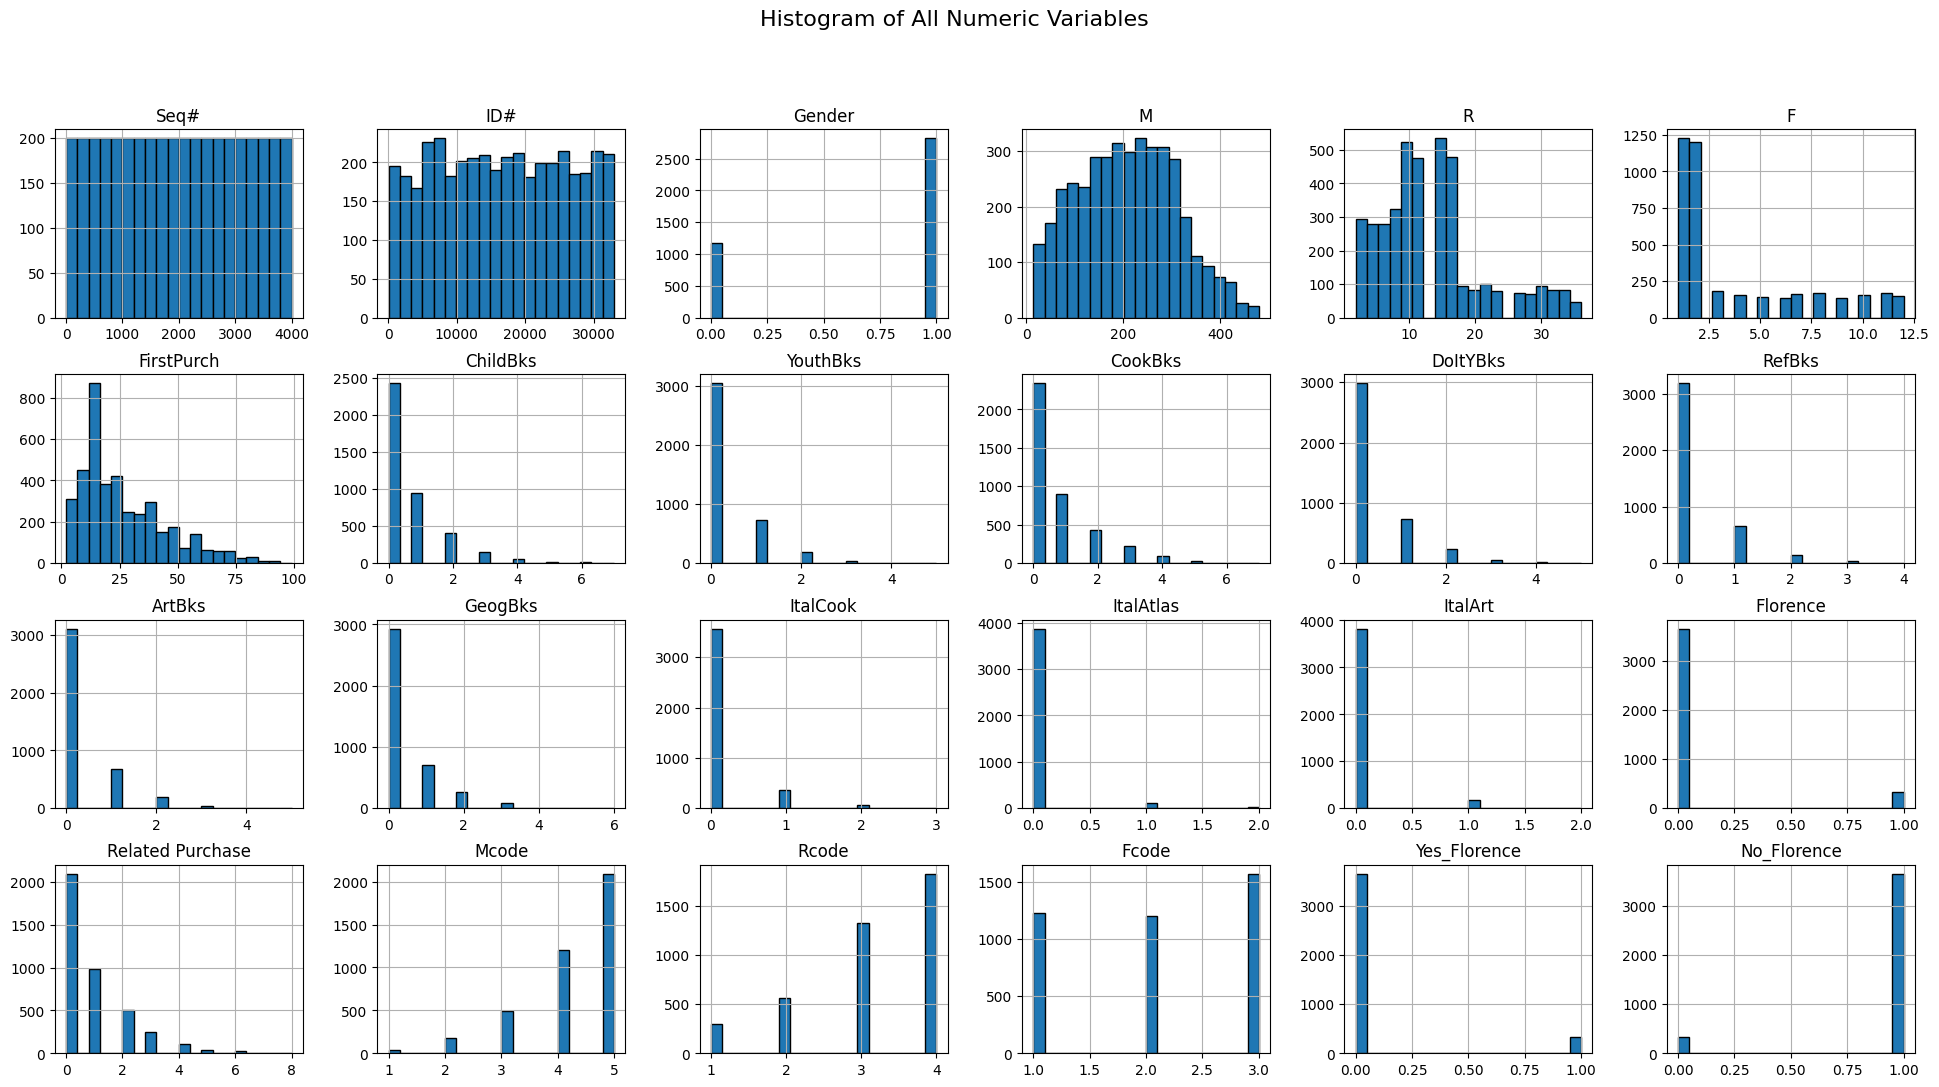

In [35]:
df.hist(figsize=(24, 12), bins=20, edgecolor="black", layout=(4,6))
plt.suptitle("Histogram of All Numeric Variables", fontsize=16)
plt.show()

#### Correlation Analysis

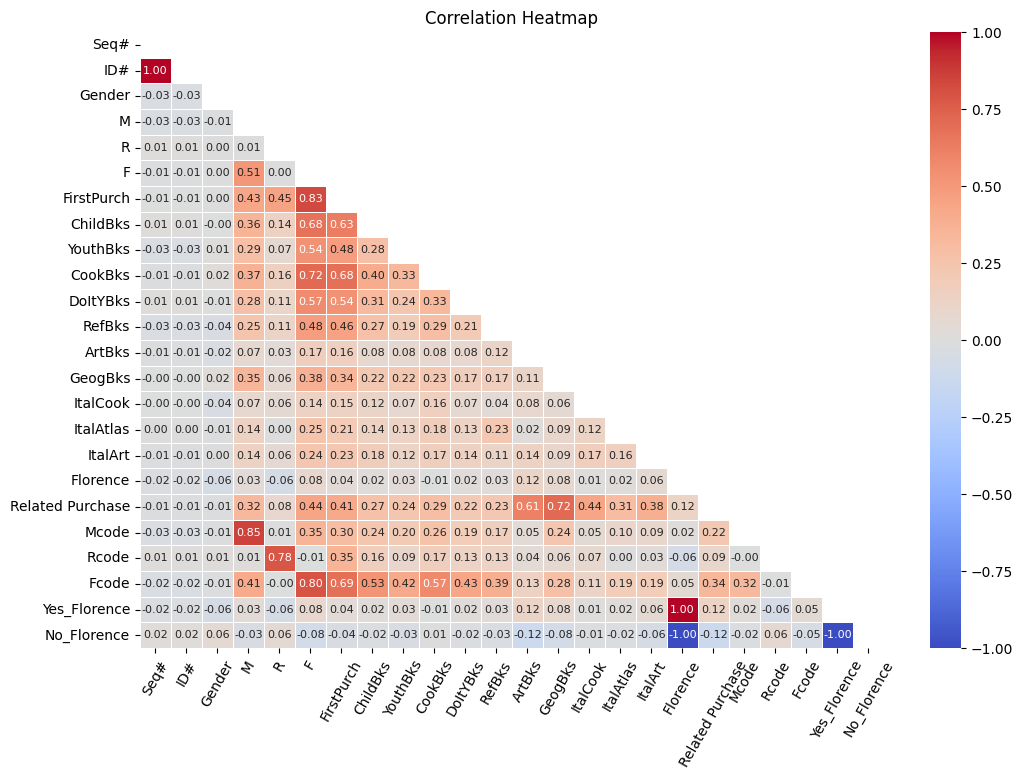

In [36]:
corr = df.corr(numeric_only=True)

# Create a mask for the upper triangle plot
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True,
            annot_kws={"size": 8}, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=60)
plt.title("Correlation Heatmap")
plt.show()

#### Target variable Distribution
"Florence" is the target (0/1 purchase indicator)

Florence
0    0.9155
1    0.0845
Name: proportion, dtype: float64


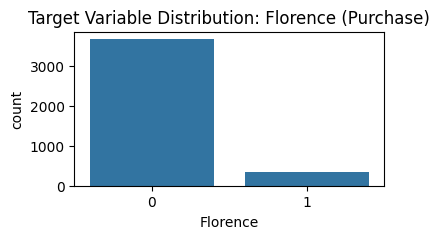

In [37]:
print(df["Florence"].value_counts(normalize=True))

plt.figure(figsize=(4, 2))
sns.countplot(x="Florence", data=df)
plt.title("Target Variable Distribution: Florence (Purchase)")
plt.show()

## Part1. RFM Segmentation

### Review how Recency, Frequency, and Monetary values are categorized

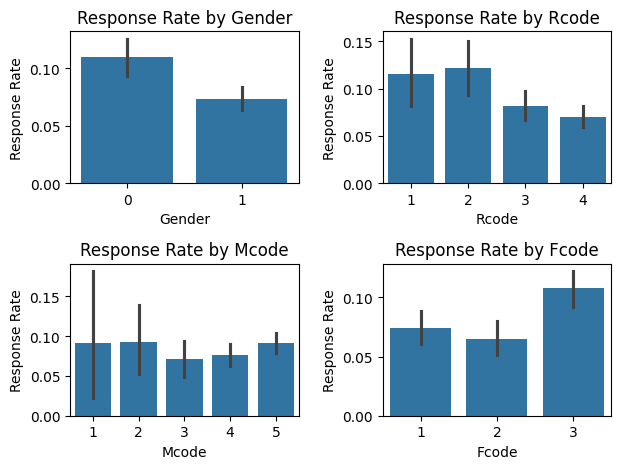

In [38]:
# 1. Gender vs Florence
plt.subplot(2, 2, 1)
sns.barplot(x="Gender", y="Florence", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Response Rate by Gender")
plt.ylabel("Response Rate")

# 2. Rcode vs Florence
plt.subplot(2, 2, 2)
sns.barplot(x="Rcode", y="Florence", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Response Rate by Rcode")
plt.ylabel("Response Rate")

# 3. Mcode vs Florence
plt.subplot(2, 2, 3)
sns.barplot(x="Mcode", y="Florence", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Response Rate by Mcode")
plt.ylabel("Response Rate")

# 4. Fcode vs Florence
plt.subplot(2, 2, 4)
sns.barplot(x="Fcode", y="Florence", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Response Rate by Fcode")
plt.ylabel("Response Rate")

plt.tight_layout()
plt.show()

### Train/Validation Split 60/40 random_state=1 

In [39]:
# Keep only necessary target column
df = df.drop(columns=["Yes_Florence", "No_Florence"], errors="ignore")

# Partition into Train / Validation
X = df.drop("Florence", axis=1)
y = df["Florence"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

train = X_train.copy()
train["Florence"] = y_train

valid = X_valid.copy()
valid["Florence"] = y_valid

print("Training set size:", train.shape)
print("Validation set size:", valid.shape)

Training set size: (2400, 22)
Validation set size: (1600, 22)


Response rate by RFM categories    
Customers are categorized into RFM bins:    
Recency (4 categories: e.g., 0–2, 3–6, 7–12, 13+ months)     
Monetary (5 categories: e.g., $0–25, $26–50, $51–100, $101–200, $201+)    
Frequency (3 categories: e.g., 1, 2, 3+ books)      
That makes 4 × 5 × 3 = 60 possible RFM combinations.   
For each combination, compute the response rate (buyers ÷ total in that segment).

In [40]:
# create RFM categary for training set

train["Rcode"] = pd.cut(train["R"], bins=[-1, 2, 6, 12, 999], 
                        labels=[1, 2, 3, 4]).astype(int)

train["Fcode"] = pd.cut(train["F"], bins=[0, 1, 2, 999], 
                        labels=[1, 2, 3]).astype(int)

train["Mcode"] = pd.cut(train["M"], bins=[-1, 25, 50, 100, 200, 99999], 
                        labels=[1, 2, 3, 4, 5]).astype(int)

### 1.1 Overall Training Response Rate
In the training dataset, calculate the overall response rate = proportion of customers who purchased the book (Florence = 1).

In [41]:
# 1. Compute overall response rate in training set
overall_rate = train["Florence"].mean()
print("Overall Training Response Rate: {:.2%}".format(overall_rate))

# 2. Compute response rate for each RFM segment (4 × 5 × 3 = 60 combinations)
rfm_rates = (
    train.groupby(["Rcode", "Fcode", "Mcode"])["Florence"]
    .mean()
    .reset_index()
    .rename(columns={"Florence": "ResponseRate"}))

# 3. Flag segments that are above the overall response rate
rfm_rates["AboveAverage"] = rfm_rates["ResponseRate"] > overall_rate

# 4. Display how many segments are above average
print("Number of above-average RFM segments:", rfm_rates["AboveAverage"].sum())

# 5. List the above-average segments with their response rates
above_avg_segments = rfm_rates[rfm_rates["AboveAverage"]].sort_values("ResponseRate", ascending=False)
print("\nAbove average RFM Segments:")
print(above_avg_segments.to_string(index=False))

Overall Training Response Rate: 8.46%
Number of above-average RFM segments: 22

Above average RFM Segments:
 Rcode  Fcode  Mcode  ResponseRate  AboveAverage
     1      3      2      1.000000          True
     2      1      1      0.500000          True
     2      3      3      0.500000          True
     1      2      2      0.333333          True
     3      1      1      0.250000          True
     1      1      4      0.222222          True
     1      3      5      0.204545          True
     1      1      2      0.200000          True
     2      3      5      0.163043          True
     2      1      2      0.142857          True
     2      2      3      0.142857          True
     1      1      5      0.120000          True
     3      3      5      0.114833          True
     2      1      5      0.111111          True
     4      2      5      0.107914          True
     4      1      3      0.104478          True
     1      2      5      0.100000          True
     3    

### 1.2 Identify which segments perform better than average

we already identified which RFM segments in the training set had response rates above the overall average. In this step, we apply those same above-average RFM combinations to the validation dataset.  
First, assign each validation customer to an RFM category (Rcode, Fcode, Mcode).  
Then, select only those validation customers whose RFM segment matches one of the above-average segments found in training.  
Finally, calculate the response rate among these selected validation customers (i.e., proportion of customers who purchased = Florence = 1).  
Let's findout   
If the validation response rate is higher than the overall average, this confirms that targeting only above-average RFM segments is an effective strategy.  
If it is not much higher, the segmentation may not generalize well.  

In [42]:
# Assign RFM codes to validation set (same binning rules as training)
valid["Rcode"] = pd.cut(valid["R"], bins=[-1, 2, 6, 12, 999], 
                        labels=[1, 2, 3, 4]).astype(int)
valid["Fcode"] = pd.cut(valid["F"], bins=[0, 1, 2, 999], 
                        labels=[1, 2, 3]).astype(int)
valid["Mcode"] = pd.cut(valid["M"], bins=[-1, 25, 50, 100, 200, 99999], 
                        labels=[1, 2, 3, 4, 5]).astype(int)

# Keep only validation customers whose RFM combination
# matches the above-average segments found in training
valid_marked = valid.merge(
    above_avg_segments[["Rcode", "Fcode", "Mcode"]],
    on=["Rcode", "Fcode", "Mcode"],
    how="inner", indicator=True)

#Computer resonse rates
valid_target_group = valid_marked[valid_marked["_merge"] == "both"]  # kept segments
valid_baseline_rate = valid["Florence"].mean() # baseline on validation
valid_target_rate   = valid_target_group["Florence"].mean() # targeted customer only

# Results
print(f"Validation baseline response rate (all customers): {valid_baseline_rate:.2%}")
print(f"Validation response rate (above-avg RFM segments only): {valid_target_rate:.2%}")
print(f"Number of validation customers targeted: {len(valid_target_group)}")
print(f"Share of validation customers targeted: {len(valid_target_group)/len(valid):.2%}")

Validation baseline response rate (all customers): 8.44%
Validation response rate (above-avg RFM segments only): 10.98%
Number of validation customers targeted: 701
Share of validation customers targeted: 43.81%


### Interpretation for 1.1 and 1.2:
The baseline in validation (8.44%) is almost the same as training (8.46%). That’s good. It means the dataset partition was consistent.
By targeting only the above-average RFM segments, the validation response rate increased to 10.98%, which is about a 30% relative lift over the baseline (10.98 ÷ 8.44 ≈ 1.3).
This shows that the RFM segmentation approach does generalize the groups that were more responsive in training also performed better than average in the holdout validation set.

## Part2. k-NN Modeling: Classification & Regression + Lift

### 2.1 Classification 
Use the 5 predictors: R, F, M, FirstPurch, RelatedPurch.
Standardize them (fit scaler on train, apply to valid).
Train k-NN classifier for k = 1…11 with weights='uniform'.
Pick the best k based on validation performance , probability quality, use AUC
For the best k, create a lift curve on the validation set and report the lift at “equal number of customers

Validation accuracy by k:
     k  accuracy
0    1  0.846250
1    2  0.910000
2    3  0.890625
3    4  0.907500
4    5  0.905000
5    6  0.910000
6    7  0.907500
7    8  0.910625
8    9  0.909375
9   10  0.913750
10  11  0.912500


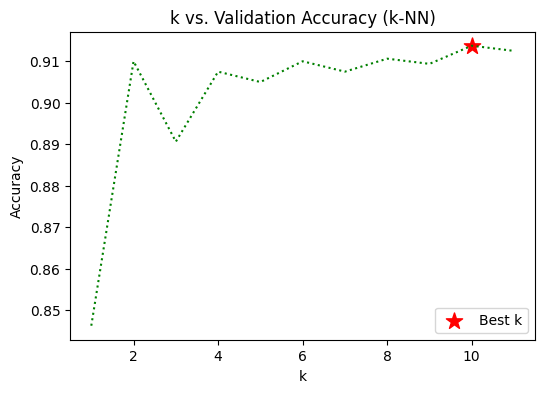


Best k = 10, Accuracy = 0.914


In [43]:
# Prepare features and target
features = ["R", "F", "M", "FirstPurch", "Related Purchase"]
X_train = train[features]
y_train = train["Florence"]
X_valid = valid[features]
y_valid = valid["Florence"]

# Normalize predictors
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)

# Train k-NN for different k values
results = []
for k in range(1, 12):   # k = 1…11
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(X_train_s, y_train)
    acc = accuracy_score(y_valid, knn.predict(X_valid_s))
    results.append({"k": k, "accuracy": acc})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Validation accuracy by k:")
print(results_df)

# Plot accuracy vs k
plt.figure(figsize=(6,4))
plt.plot(results_df.k, results_df.accuracy, linestyle=':', c='green')
plt.title('k vs. Validation Accuracy (k-NN)')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Highlight the best k
best_row = results_df.loc[results_df.accuracy.idxmax()]
plt.scatter(best_row.k, best_row.accuracy, c='red', marker='*', s=150, label="Best k")
plt.legend()
plt.show()

print(f"\nBest k = {int(best_row.k)}, Accuracy = {best_row.accuracy:.3f}")

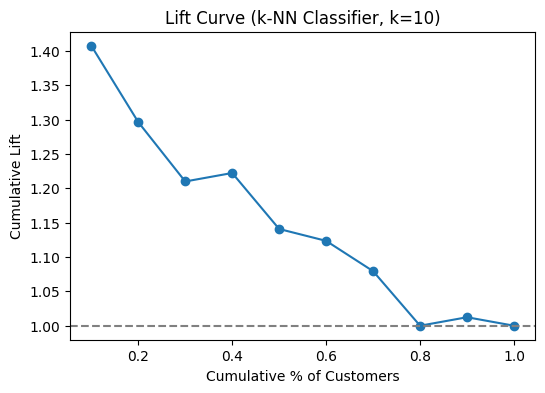

Validation baseline rate: 8.44%
Target response rate: 11.85%
Expected Lift: 1.405


In [44]:
best_k = 10   # Choose best k (we already found it)
knn = KNeighborsClassifier(n_neighbors=best_k, weights="uniform")
knn.fit(X_train_s, y_train)

# Predicted probabilities for validation set
y_scores = knn.predict_proba(X_valid_s)[:,1]

# Create Lift Curve
def make_lift_curve(y_true, y_score, nbins=10):
    df = pd.DataFrame({"y": y_true, "score": y_score})
    df = df.sort_values("score", ascending=False).reset_index(drop=True)
    df["decile"] = pd.qcut(df.index, nbins, labels=False) + 1
    
    gains = df.groupby("decile")["y"].agg(["count","sum"]).reset_index()
    gains["cum_resp"] = gains["sum"].cumsum()
    gains["cum_customers"] = gains["count"].cumsum()
    baseline_rate = df["y"].mean()
    gains["cum_rate"] = gains["cum_resp"] / gains["cum_customers"]
    gains["lift"] = gains["cum_rate"] / baseline_rate
    return gains, baseline_rate

lift_df, baseline_rate = make_lift_curve(y_valid.values, y_scores, nbins=10)

# Plot Lift Curve
plt.figure(figsize=(6,4))
plt.plot(lift_df["cum_customers"]/len(y_valid), lift_df["lift"], marker="o")
plt.axhline(1.0, color="grey", linestyle="--")
plt.title(f"Lift Curve (k-NN Classifier, k={best_k})")
plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative Lift")
plt.show()

# Compute Expected Lift for an equal number of customer
N_buyers = int(y_valid.sum())    # actual number of buyers in validation
order = np.argsort(-y_scores)    # sort by predicted score (descending)
topN = order[:N_buyers]                     # take top N
precision_at_N = y_valid.iloc[topN].mean()  # response rate in top N
expected_lift = precision_at_N / baseline_rate

print(f"Validation baseline rate: {baseline_rate:.2%}")
print(f"Target response rate: {precision_at_N:.2%}")
print(f"Expected Lift: {expected_lift:.3f}")

### 2.2 Regression / distance weights
1. Using the same best k, train k-NN regressor with weights='distance' on the same 5 standardized predictors.  
2. Compute predictions on validation and draw a lift curve.  
3. State the range of predictions (should lie in [0, 1] because it’s an average of 0/1 neighbors).  
4. compare with the classification lift.  

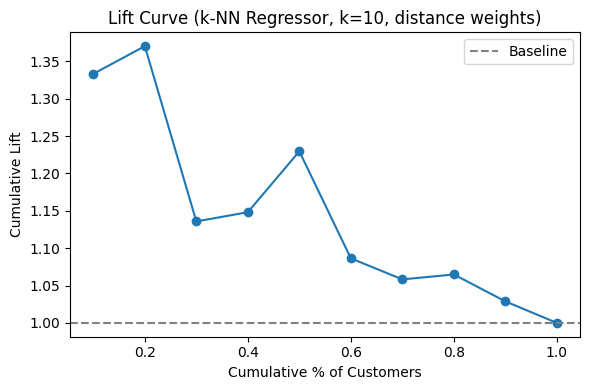

Validation baseline rate: 8.44%
Target response rate (Top N): 12.59%
Expected Lift: 1.492


In [45]:
from sklearn.neighbors import KNeighborsRegressor

# Train distance-weighted k-NN regressor with best_k
reg = KNeighborsRegressor(n_neighbors=best_k, weights="distance")
reg.fit(X_train_s, y_train)

# Regression scores on validation
y_scores_reg = reg.predict(X_valid_s)   # continuous scores in [0,1]

# Build lift table & plot lift curve (reuse make_lift_curve)
lift_df_reg, baseline_rate_reg = make_lift_curve(y_valid.values, y_scores_reg, nbins=10)

# Plot Lift Curve
plt.figure(figsize=(6,4))
plt.plot(lift_df_reg["cum_customers"]/len(y_valid), lift_df_reg["lift"], marker="o")
plt.axhline(1.0, color="gray", linestyle="--", label="Baseline")
plt.title(f"Lift Curve (k-NN Regressor, k={best_k}, distance weights)")
plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative Lift")
plt.legend()
plt.tight_layout()
plt.show()

# Compute Expected Lift for an equal number of customers
N_buyers = int(y_valid.sum())               
order = np.argsort(-y_scores_reg)           
topN = order[:N_buyers]                     
target_rate = y_valid.iloc[topN].mean()     
expected_lift_reg = target_rate / baseline_rate_reg

print(f"Validation baseline rate: {baseline_rate_reg:.2%}")
print(f"Target response rate (Top N): {target_rate:.2%}")
print(f"Expected Lift: {expected_lift_reg:.3f}")

### Interpretation for 2.1 and 2.2:
The regression predictions fall within the range 0 to 1 because they are averages of neighbor outcomes. Compared with the k-NN classifier (k=10), the regression gave slightly higher response rate (12.59% vs. 11.85%) and lift (1.492 vs. 1.405). showing a small improvement. 

## Part3. Logistic Regression Modeling (+ 30% Cutoff)
1.	Outcome: Florence (0/1, whether customer purchased the book).
2.	Training data: 2400 records (your training split).
3.	Models to fit:
	•	Model 1: Logistic regression using all 16 predictors.
	•	Model 2: Logistic regression using a subset of predictors you choose as “best” (based on EDA, importance, VIF, or domain knowledge).
4.	Deliverable: Fit both models and compare their performance (AUC, accuracy, maybe lift/gains if required).


### Model 1: All 16 predictors

In [46]:
# df = df.drop(columns=["Yes_Florence", "No_Florence"], errors="ignore")

X = df.drop(columns = ["Florence", "Seq#", "ID#", "Mcode", "Rcode", "Fcode"], axis=1)
y = df["Florence"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y)

train = X_train.copy()
train["Florence"] = y_train

valid = X_valid.copy()
valid["Florence"] = y_valid

print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)


Training set size: (2400, 16)
Validation set size: (1600, 16)


In [47]:
print(df.shape)
print(train.shape)
print(valid.shape)

(4000, 22)
(2400, 17)
(1600, 17)


In [48]:
print(train.head())

      Gender    M   R  F  FirstPurch  ChildBks  YouthBks  CookBks  DoItYBks  \
530        1  109  10  6          30         0         1        1         1   
3059       0   79   6  4          24         0         1        1         0   
2037       1  229   4  8          22         0         1        1         1   
2973       1  161  10  9          30         1         3        2         2   
1626       0  249  10  1          10         0         0        0         0   

      RefBks  ArtBks  GeogBks  ItalCook  ItalAtlas  ItalArt  Related Purchase  \
530        0       0        2         0          0        0                 2   
3059       0       0        0         0          0        0                 0   
2037       0       0        0         0          0        0                 0   
2973       0       0        0         0          0        0                 0   
1626       0       0        1         0          0        0                 1   

      Florence  
530          0  
3059

In [49]:
# Prepare training/validation
X_train_full = train.drop(columns=["Florence"])
y_train = train["Florence"].astype(int)

X_valid_full = valid.drop(columns=["Florence"])
y_valid = valid["Florence"].astype(int)

# Model 1: Logistic regression with ALL predictors
lr_full = LogisticRegression(max_iter=1000, solver="liblinear")
lr_full.fit(X_train_full, y_train)

y_pred_full = lr_full.predict(X_valid_full)
y_prob_full = lr_full.predict_proba(X_valid_full)[:,1]

print("Logistic Regression (Full 16 predictors):")
print("Accuracy:", accuracy_score(y_valid, y_pred_full))
print("AUC:", roc_auc_score(y_valid, y_prob_full))


Logistic Regression (Full 16 predictors):
Accuracy: 0.916875
AUC: 0.6265073947667805


### Model 2: Logistic regression with SELECTED predictors

In [50]:
#  R, F, M, FirstPurch, Related Purchase
subset_features = ["R", "F", "M", "FirstPurch", "Related Purchase"]

X_train_sub = train[subset_features]
X_valid_sub = valid[subset_features]

log_sub = LogisticRegression(max_iter=1000, solver="liblinear")
log_sub.fit(X_train_sub, y_train)

y_pred_sub = log_sub.predict(X_valid_sub)
y_prob_sub = log_sub.predict_proba(X_valid_sub)[:,1]

print("Logistic Regression (Subset predictors)")
print("Accuracy:", accuracy_score(y_valid, y_pred_sub))
print("AUC:", roc_auc_score(y_valid, y_prob_sub))

Logistic Regression (Subset predictors)
Accuracy: 0.915625
AUC: 0.6469852104664391


### Cutoff 30%

In [51]:
# Set cutoff threshold
cutoff = 0.30

# Predicted probabilities on validation data (from fitted model)
y_prob_valid = lr_full.predict_proba(X_valid)[:, 1]

# Targeted customers = those with predicted probability ≥ cutoff
targeted = valid.copy()
targeted["prob_purchase"] = y_prob_valid
targeted = targeted[targeted["prob_purchase"] >= cutoff]

# Count how many customers are targeted
n_targeted = targeted.shape[0]

# Count how many actual buyers (Florence=1) 
n_buyers = targeted["Florence"].sum()

print(f"Total targeted customers (≥ {cutoff:.0%} likelihood): {n_targeted}")
print(f"Number of buyers within targeted set: {n_buyers}")

Total targeted customers (≥ 30% likelihood): 29
Number of buyers within targeted set: 14


## Summery / Results

**Business Objective**  

As the data scientist supporting Charles Book Club, my focus in this project was on helping us design a more efficient promotional campaign for The Art History of Florence. Instead of sending mail to all members which is costly and produces a low overall response rate, I looked at ways to identify the customers most likely to buy. By targeting only those higher probability customers, we can reduce wasted mailings and improve revenue for the business.  

**Models Used and Why**  

To do this, I applied a few different data mining approaches to our Charles Book Club data. I started with RFM segmentation (Recency, Frequency, Monetary) to see which customer groups historically responded more often. I then tested k-Nearest Neighbor (k-NN) models, which classify customers based on their similarity to past buyers, and also built logistic regression models, which are common in marketing because they give us clear purchase probabilities and are easy to explain. I chose these models because they’re effective, straightforward, and well-suited for consumer purchase data.  

**Model Results and Recommendations**  

The results showed that if we continue to mail to everyone, we can only expect the baseline response rate of about 8% (meaning 8 out of 100 customers typically buy). By using RFM segments, k-NN, and logistic regression models, we were able to identify groups of customers with much higher response rates. For example, logistic regression with selected predictors found groups raising response rates into the 12% range(where around 12 out of 100 customers purchased). This represents a lift of about 1.4 to 1.5, which simply means these customers are 1.5 times more likely to respond compared to the average.  

**Recommendation**: We should focus our mailings on customers with at least a 30% predicted likelihood of purchase. This targeted approach will reduce mailing costs, increase return on investment, and give us a more data-driven way to run future campaigns.